# Introduction

# Goal.
The goal of this lab is to familiarize yourself with some advanced forms of evolutionary computation (EC). In particular, you will explore the use of Evolution Strategies (ES) and Covariance Matrix Adaptation Evolution Strategies (CMA-ES). You will observe the effects of different forms of self-adaptation and how these are useful for black-box optimization.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

# Exercise 1
In this exercise you will explore the use of Evolution Strategies (ES). ES are a popular class of evolutionary algorithms used for optimization problems. In particular you will explore the popular ($\mu$/$\rho$,$\lambda$)-ES where $\mu$ denotes the number of parents, $\rho\leq\mu$ the number of parents involved in the producing a single offspring (mixing number), $\lambda$ the number of offspring, and *comma* selection is employed.

To start the experiments, run the next cell. Note that, as usual, you may change the seed forthe pseudo-random number generator. 

This code will attempt to optimize the 10-dimensional __[Rosenbrock function](http://pythonhosted.org/inspyred/reference.html\#inspyred.benchmarks.Rosenbrock)__ using an Evolutionary Strategy without self-adaptation or recombination (which is very similar to the GA you used in the first module's exercises).

Try adjusting the various parameters: $\mu$, $\lambda$, and $\rho$, (by changing, respectively, `args[pop_size]`, `args[num_offspring]`, and `args[mixing_number]` in the next cell. 
- What happens if you make $\lambda$ smaller e.g. $\lambda=\mu$? 
il valore medio della fitness su più run aumenta e ancge la variabilità dei risultati aumenta
- What happens if you increase the mixing number $\rho$?
il valore medio della fitness diminisce e anche la varianza
- Does this confirm or contradict the conclusions you drew in the previous lab?


Try out the different strategy modes (change the parameter `args[strategy_mode]`), and observe how they affect the performance of the algorithm:

- `None` means that there is no self-adaptation
- `es.GLOBAL` means each genome encodes a global step-size (mutation standard deviation)
- `es.INDIVIDUAL` means each genome encodes an independent step-size for each gene.



------------------------------------------------
basic None
pop_size: 20
num_offspring: 100
mixing_number: 5
strategy_mode: None
------------------------------------------------
change population size None
pop_size: 5
num_offspring: 100
mixing_number: 5
strategy_mode: None
------------------------------------------------
change num_offspring None
pop_size: 20
num_offspring: 20
mixing_number: 5
strategy_mode: None
------------------------------------------------
change mixing_number None
pop_size: 20
num_offspring: 100
mixing_number: 2
strategy_mode: None
------------------------------------------------
basic GLOBAL
pop_size: 20
num_offspring: 100
mixing_number: 5
strategy_mode: Global
------------------------------------------------
change population size GLOBAL
pop_size: 5
num_offspring: 100
mixing_number: 5
strategy_mode: Global
------------------------------------------------
change num_offspring GLOBAL
pop_size: 20
num_offspring: 20
mixing_number: 5
strategy_mode: Global
----------

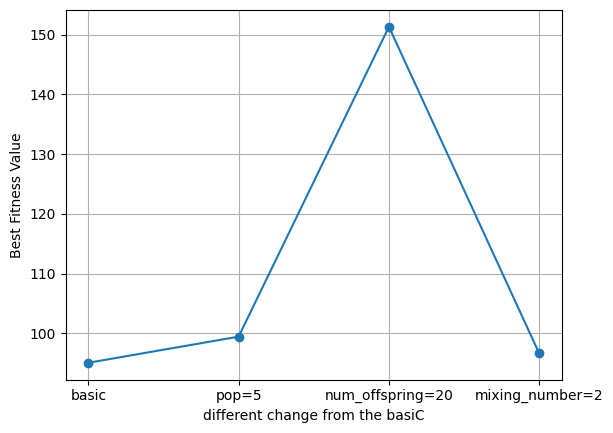

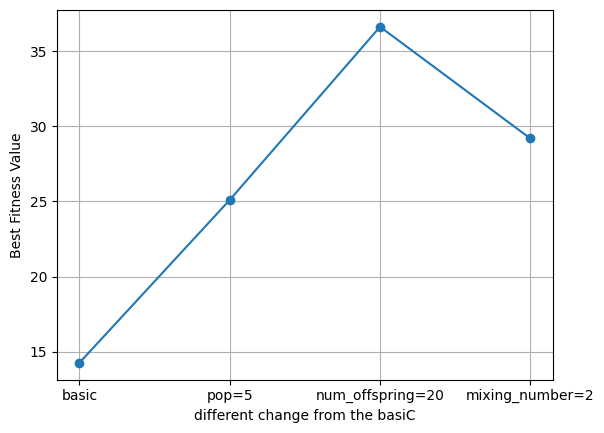

media delle fitness su più run in tutti i casi:  [0.20286949455127665, 20.613163822785253, 18.682863241831566, 43.89465165241448]
varianza delle fitness in tutti i casi:  [0.28571870911133396, 27.711899532491593, 34.823978538947934, 33.89552990678063]


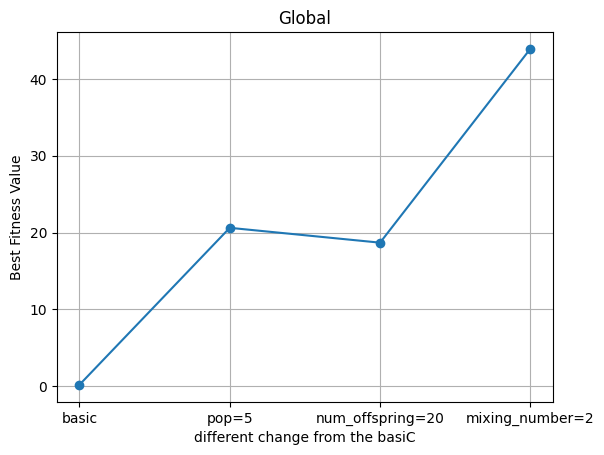

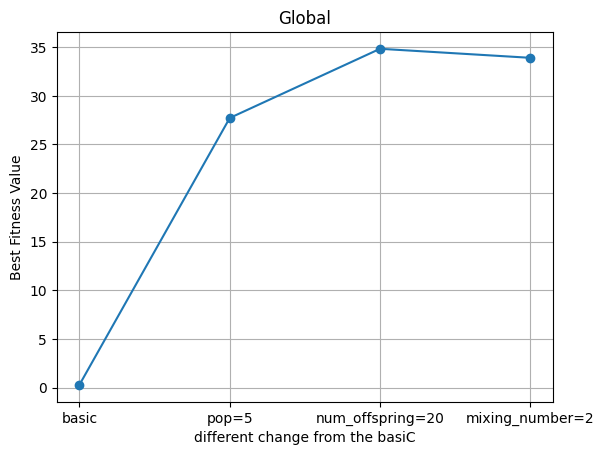

media delle fitness su più run in tutti i casi:  [19.104461382979878, 20.09187961670792, 11.84405013308842, 2.8100052594497824]
varianza delle fitness in tutti i casi:  [37.462226749327456, 34.032369819414356, 6.842526379701826, 2.5423730787562553]


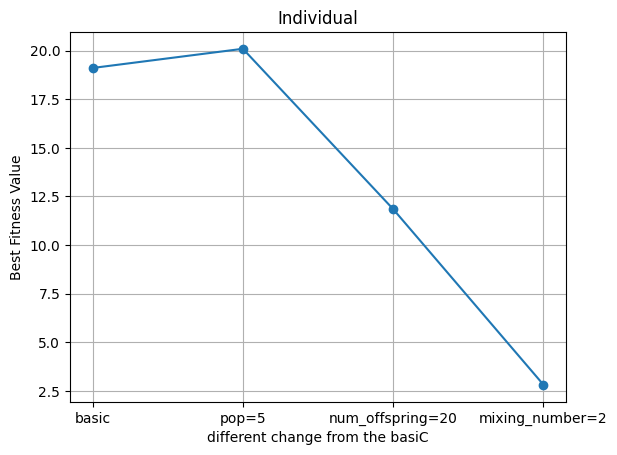

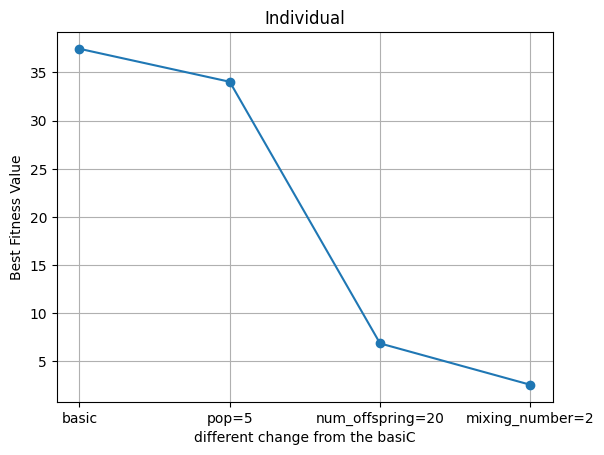

In [2]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations
seed = None
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
runs = {
    'basic None': [20, 100, 5, None],
    'change population size None': [ 5, 100, 5, None,'population size from 20 to 5'],
    'change num_offspring None': [ 20, 20, 5, None,'num offspring from 100 to 20'],
    'change mixing_number None': [ 20, 100, 2, None,'mixing number from 5 to 2'],
    'basic GLOBAL': [20, 100, 5, GLOBAL],
    'change population size GLOBAL': [ 5, 100, 5, GLOBAL,'population size from 20 to 5'],
    'change num_offspring GLOBAL': [ 20, 20, 5, GLOBAL,'num offspring from 100 to 20'],
    'change mixing_number GLOBAL': [ 20, 100, 2, GLOBAL,'mixing number from 5 to 2'],
    'basic INDIVIDUAL': [20, 100, 5, INDIVIDUAL],
    'change population size INDIVIDUAL': [ 5, 100, 5, INDIVIDUAL,'population size from 20 to 5'],
    'change num_offspring INDIVIDUAL': [ 20, 20, 5, INDIVIDUAL,'num offspring from 100 to 20'],
    'change mixing_number INDIVIDUAL': [ 20, 100, 2, INDIVIDUAL,'mixing number from 5 to 2']
}

solutions_mean = {}
solutions_std = {}
for run in runs:
    print('------------------------------------------------')
    print(run)
    print('pop_size:', runs[run][0] )
    print('num_offspring:', runs[run][1] )
    print('mixing_number:', runs[run][2] )
    print('strategy_mode:', runs[run][3] )
    best = []
    
    for i in range(5):

        num_vars = 10

        # parameters for the ES
        args = {}
        args["max_generations"] = 100
        args["sigma"] = 1.0 # default standard deviation

        args["pop_size"] = runs[run][0] # mu
        args["num_offspring"] = runs[run][1] #lambda

        args["strategy_mode"] = runs[run][3]

        args["mixing_number"] = runs[run][2] #rho
        #args["mixing_number"] = 5

        #args["problem_class"] = benchmarks.Sphere
        args["problem_class"] = benchmarks.Rosenbrock
        #args["problem_class"] = benchmarks.Rastrigin

        """
        -------------------------------------------------------------------------
        """

        args["fig_title"] = 'ES'


        # Run the ES
        best_individual, best_fitness, final_pop = run_es(rng,num_vars=num_vars,
                                            display=display,use_log_scale=True,
                                            **args)

        # Display the results
        #print("Best Individual:", best_individual)
        #print("Best Fitness:", best_fitness)
        best.append(best_fitness)
    media = np.mean(best)
    varianza = np.std(best)
    if runs[run][3] not in solutions_mean:
        solutions_mean[runs[run][3]] = [media ]
        solutions_std[runs[run][3]] = [varianza ]
    else:
        solutions_mean[runs[run][3]].append(media)
        solutions_std[runs[run][3]].append(varianza)


    if display :
        ioff()
        show()


for func in solutions_mean:
    print('media delle fitness su più run in tutti i casi: ',solutions_mean[func])
    print('varianza delle fitness in tutti i casi: ',solutions_std[func])
    # Create the plot
    plt.figure()
    plt.plot(solutions_mean[func], marker='o')
    plt.title(func)
    plt.xlabel('different change from the basiC')
    plt.ylabel('Best Fitness Value')
    plt.xticks(ticks=range(4), labels=['basic', 'pop=5', 'num_offspring=20', 'mixing_number=2'])
    plt.grid(True)

    # Show the plot
    plt.show()

    plt.figure()
    plt.plot(solutions_std[func], marker='o')
    plt.title(func)
    plt.xlabel('different change from the basiC')
    plt.ylabel('Best Fitness Value')
    plt.xticks(ticks=range(4), labels=['basic', 'pop=5', 'num_offspring=20', 'mixing_number=2'])
    plt.grid(True)

    # Show the plot
    plt.show()

------------------------------------------------
basic None
pop_size: 20
num_offspring: 100
mixing_number: 5
strategy_mode: None
------------------------------------------------
change population size None
pop_size: 50
num_offspring: 100
mixing_number: 5
strategy_mode: None
------------------------------------------------
change num_offspring None
pop_size: 20
num_offspring: 140
mixing_number: 5
strategy_mode: None
------------------------------------------------
change mixing_number None
pop_size: 20
num_offspring: 100
mixing_number: 10
strategy_mode: None
------------------------------------------------
basic GLOBAL
pop_size: 20
num_offspring: 100
mixing_number: 5
strategy_mode: Global
------------------------------------------------
change population size GLOBAL
pop_size: 50
num_offspring: 100
mixing_number: 5
strategy_mode: Global
------------------------------------------------
change num_offspring GLOBAL
pop_size: 20
num_offspring: 140
mixing_number: 5
strategy_mode: Global
-----

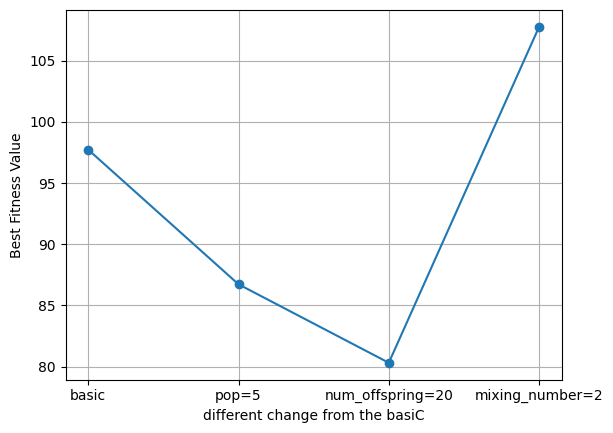

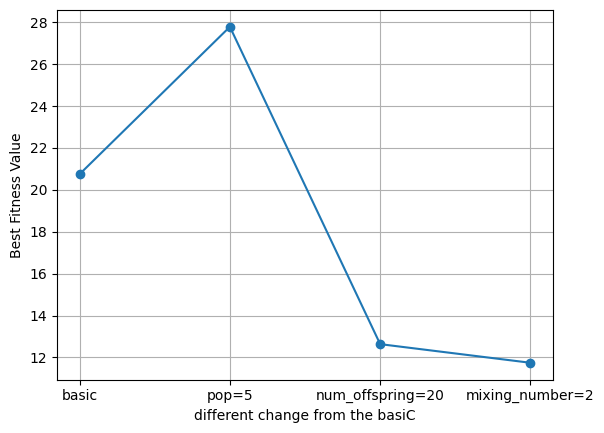

media delle fitness su più run in tutti i casi:  [0.9675482697984081, 0.3918650666820672, 0.465416746460543, 0.6606050222919857]
varianza delle fitness in tutti i casi:  [0.4329350216630219, 0.19271821131840103, 0.3445949700356229, 0.6676121386372719]


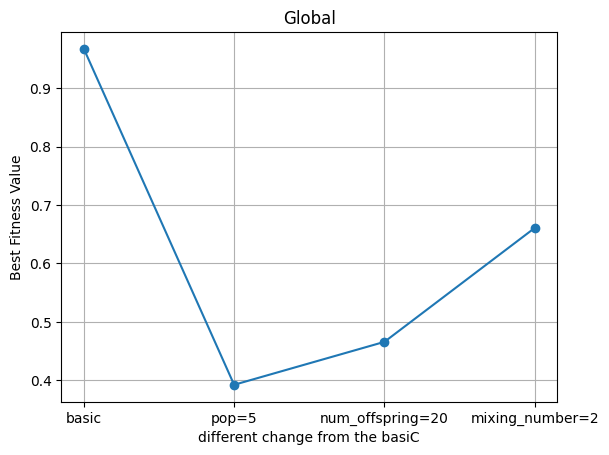

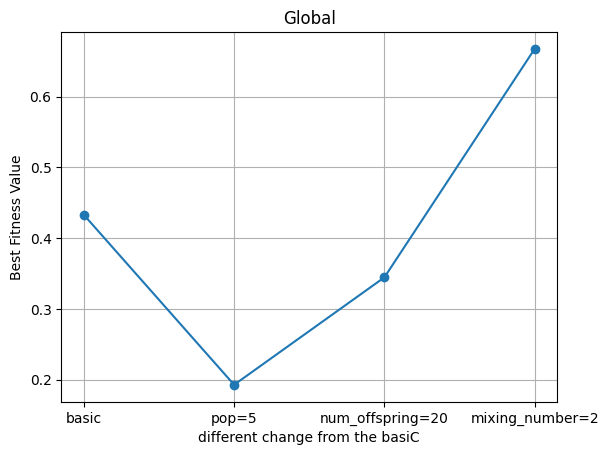

media delle fitness su più run in tutti i casi:  [1.6628316714511318, 0.2967542477323942, 0.49318398725172347, 1.0777673680727926]
varianza delle fitness in tutti i casi:  [2.702060257665606, 0.21468069035752674, 0.4862542850029287, 1.60092123944387]


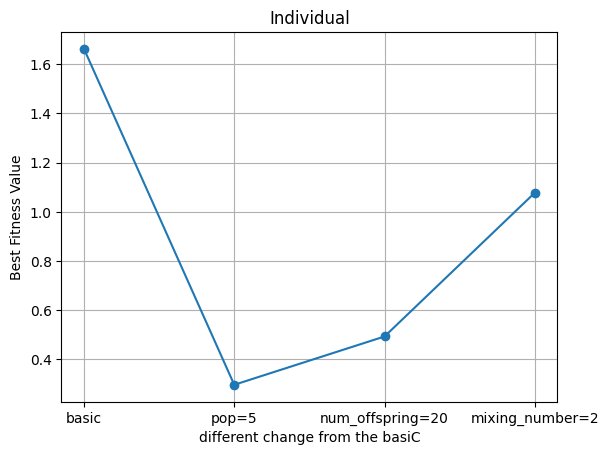

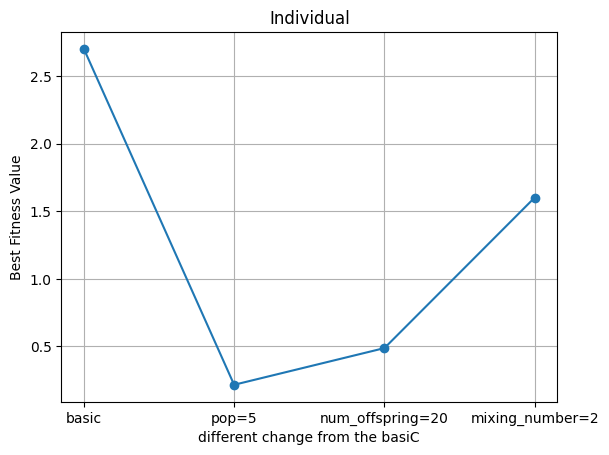

In [3]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations
seed = None
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
runs = {
    'basic None': [20, 100, 5, None],
    'change population size None': [ 50, 100, 5, None,'population size from 20 to 50'],
    'change num_offspring None': [ 20, 140, 5, None,'num offspring from 100 to 140'],
    'change mixing_number None': [ 20, 100, 10, None,'mixing number from 5 to 10'],
    'basic GLOBAL': [20, 100, 5, GLOBAL],
    'change population size GLOBAL': [ 50, 100, 5, GLOBAL,'population size from 20 to 50'],
    'change num_offspring GLOBAL': [ 20, 140, 5, GLOBAL,'num offspring from 100 to 140'],
    'change mixing_number GLOBAL': [ 20, 100, 10, GLOBAL,'mixing number from 5 to 10'],
    'basic INDIVIDUAL': [20, 100, 5, INDIVIDUAL],
    'change population size INDIVIDUAL': [ 50, 100, 5, INDIVIDUAL,'population size from 20 to 50'],
    'change num_offspring INDIVIDUAL': [ 20, 140, 5, INDIVIDUAL,'num offspring from 100 to 140'],
    'change mixing_number INDIVIDUAL': [ 20, 100, 10, INDIVIDUAL,'mixing number from 5 to 10']
}

solutions_mean = {}
solutions_std = {}
for run in runs:
    print('------------------------------------------------')
    print(run)
    print('pop_size:', runs[run][0] )
    print('num_offspring:', runs[run][1] )
    print('mixing_number:', runs[run][2] )
    print('strategy_mode:', runs[run][3] )
    best = []
    
    for i in range(5):

        num_vars = 10

        # parameters for the ES
        args = {}
        args["max_generations"] = 100
        args["sigma"] = 1.0 # default standard deviation

        args["pop_size"] = runs[run][0] # mu
        args["num_offspring"] = runs[run][1] #lambda

        args["strategy_mode"] = runs[run][3]

        args["mixing_number"] = runs[run][2] #rho
        #args["mixing_number"] = 5

        #args["problem_class"] = benchmarks.Sphere
        args["problem_class"] = benchmarks.Rosenbrock
        #args["problem_class"] = benchmarks.Rastrigin

        """
        -------------------------------------------------------------------------
        """

        args["fig_title"] = 'ES'


        # Run the ES
        best_individual, best_fitness, final_pop = run_es(rng,num_vars=num_vars,
                                            display=display,use_log_scale=True,
                                            **args)

        # Display the results
        #print("Best Individual:", best_individual)
        #print("Best Fitness:", best_fitness)
        best.append(best_fitness)
    media = np.mean(best)
    varianza = np.std(best)
    if runs[run][3] not in solutions_mean:
        solutions_mean[runs[run][3]] = [media ]
        solutions_std[runs[run][3]] = [varianza ]
    else:
        solutions_mean[runs[run][3]].append(media)
        solutions_std[runs[run][3]].append(varianza)


    if display :
        ioff()
        show()


for func in solutions_mean:
    print('media delle fitness su più run in tutti i casi: ',solutions_mean[func])
    print('varianza delle fitness in tutti i casi: ',solutions_std[func])
    # Create the plot
    plt.figure()
    plt.plot(solutions_mean[func], marker='o')
    plt.title(func)
    plt.xlabel('different change from the basiC')
    plt.ylabel('Best Fitness Value')
    plt.xticks(ticks=range(4), labels=['basic', 'pop=5', 'num_offspring=20', 'mixing_number=2'])
    plt.grid(True)

    # Show the plot
    plt.show()

    plt.figure()
    plt.plot(solutions_std[func], marker='o')
    plt.title(func)
    plt.xlabel('different change from the basiC')
    plt.ylabel('Best Fitness Value')
    plt.xticks(ticks=range(4), labels=['basic', 'pop=5', 'num_offspring=20', 'mixing_number=2'])
    plt.grid(True)

    # Show the plot
    plt.show()

# Exercise 2
In this exercise you will systematically explore some of the intuitions you gained in Exercise 1. By default this code is configured to run $10$ ES runs apiece with each different strategy mode. The best fitnesses of each run are shown in a boxplot similar to what you saw in the first module's exercises.

- How does the self-adaptation strategy influence performance on this problem?
in medi anon va a dare risultati migliori però il valore del primo quartile è molto più basso, probabilmente perchè adattando i parametri sngolarmente per ogni individuo si riesce a fittare meglio il valore minimo 
- Does what you see here confirm what you suspected from the previous exercise?


Use the provided code as a template to systematically explore the other parameters.

**Note**: To study the effect of parameters, it's important to change only **one parameter at a time**, i.e. keep everything fixed except for the parameter you want to study, and for each parameter under study create box plots to compare different values.

**Note**: In order to make a fair comparison you must keep the number of function evaluations (i.e., $\lambda$ $\times$ `max_generations`) fixed$^{[1]}$.

- How do the values of $\mu$, $\rho$, and $\lambda$ influence the performance given a particular self-adaptation strategy and other parameters?
Nella strategia globale tende a diminuire la varianza delle solzuini aumentando il numero di individui iniziali, questo forse potrebbe succedere perchè avenfo tanti individui ho una popoolazione più vatia e quindi potrei riuscire a trovare più facilmente l'ottimo, inoltre tutti gli individui modificano il loro parametro di mutazione in modo comune, questo potrebbe faclitare l'adattamento alla funzione per la ricerca del minimo. Diminuendo il lambda invece vado a diminuire il numero di figli generati, la varianza sia nel caso global che individual diminuisce mentre aumenta nel caso none. in tutti questi casi però il valore medio rimane invariato tra tutti i 3 esperimenti (base, cambando mu e cambaindo labda). Nel caso in cui aumento il numero di genitori che procreano il valore della fitness in tutti i 3 casi (None, global, individual) diminuisce, questo eprchè introduco più variabilità nei figli e più probabilità che i ifgli ottenuti siano lontani dai parents e quindi miglirooi.
Diminuendo il numero della popolazione (mu) invece diminuisce la variabilità ei risultati in tutti i casi e in mediai valori non cambaino. Questo potrebbe succedere perchè se parto da un buonn punto iniziale allora sono già abbastnza vicno all'ottimo e di conseguenzanon ho bisogno di troppi individui. Anche avere un lambda più alto mi aiuta nell'ottenere risultati miglori e meno variabili in quanto genero più figli e ho più probabilità di ottenere u byuon figlio
 
- Can you come up with any rules of thumb for choosing these parameters?

mu down, lambda & rho up


In order to see how general your results are you can explore different benchmark problems$^{[2]}$ on different numbers of variables. You can change the problem by changing the parameter `args[problem_class]` and the problem dimension (number of variables) by changing the variable `num_vars` in the next cell. Note that most benchmark problems are *scalable*, i.e. they can be defined for any number of variables.

- Can you find a choice of parameters that works properly across several problems?


---
[1]:
When you compare multiple algorithms on the same problem, the computational budget allotted to any of them should be same, in order to get a fair comparison. So, if you run experiments with different values of $\lambda$, you should adjust `max_generations` accordingly, so that the total number of evaluations is consistent across experiments. E.g.: {$\lambda=50$, `max_generations`$=100$}, {$\lambda=100$, `max_generations`$=50$}, etc. One rule of thumb sometimes used in evolutionary computation papers and black-box optimization competitions is to run each algorithm for $5000 \times n$ fitness evaluations, where $n$ is the problem dimension. Also bear in mind that some algorithms are not generational at all: in those cases, the stop criterion must be expressed in terms of absolute number of evaluations, or as a convergence condition.

[2]:
See __[link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks)__ for a list of single-objective benchmark problems.

# Rosenbrock

basic [20, 100, 1, 100]
{'max_generations': 100, 'pop_size-mu': 20, 'num_offspring-lambda': 100, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


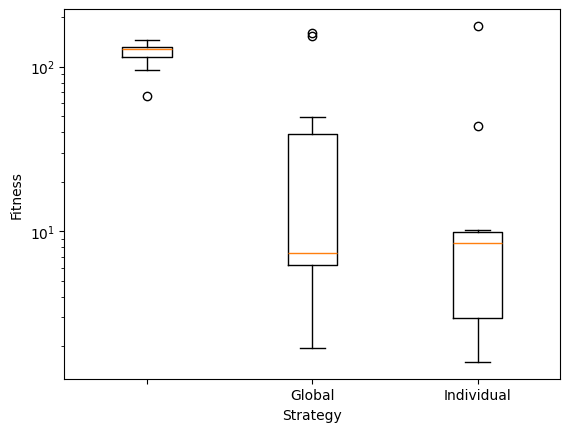

118.775793211474 40.58269598674222 26.808838558158754
change mu up [50, 100, 1, 100]
{'max_generations': 100, 'pop_size-mu': 50, 'num_offspring-lambda': 100, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


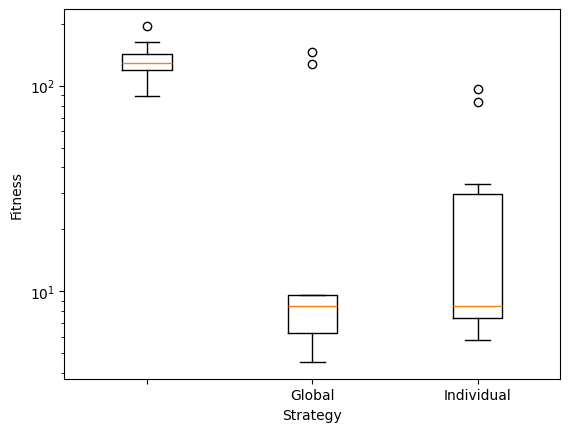

134.79443674328903 33.444407426560204 27.714526236688897
change mu down [10, 100, 1, 100]
{'max_generations': 100, 'pop_size-mu': 10, 'num_offspring-lambda': 100, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


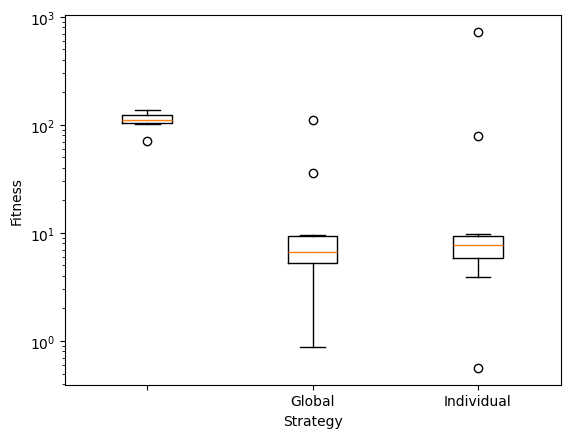

111.2335872509 19.134371448812338 85.52462842395994
change lamda up [20, 200, 1, 50]
{'max_generations': 50, 'pop_size-mu': 20, 'num_offspring-lambda': 200, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


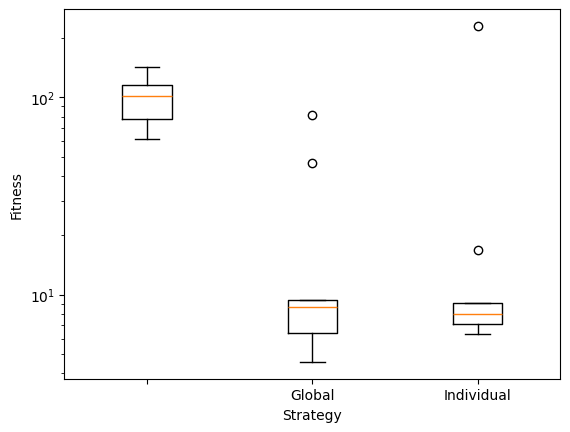

98.02549485196636 18.72846722649745 30.80353378748024
change lamda down [20, 40, 1, 250]
{'max_generations': 250, 'pop_size-mu': 20, 'num_offspring-lambda': 40, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


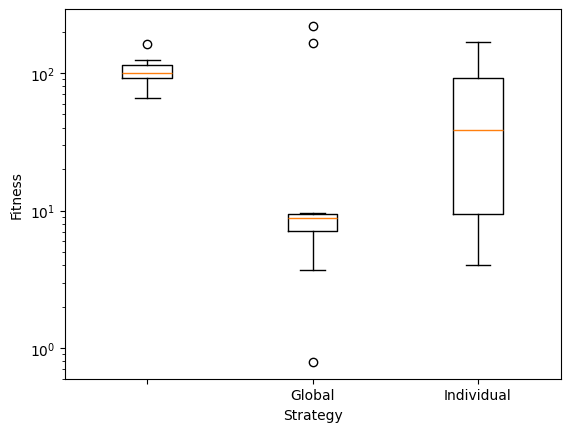

103.51213453117944 44.08461578925839 59.254308704258634
change mixing number up [20, 100, 5, 100]
{'max_generations': 100, 'pop_size-mu': 20, 'num_offspring-lambda': 100, 'mixing_number-rho': 5, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


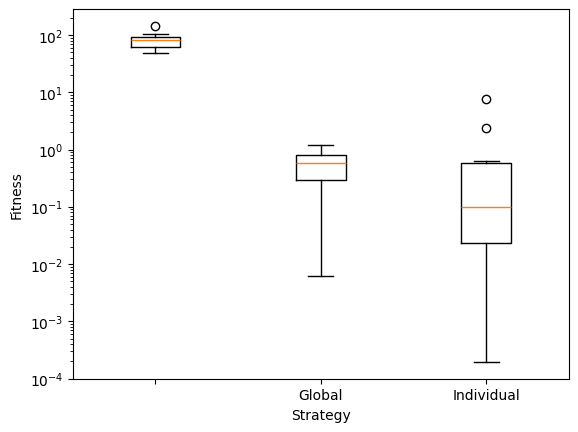

82.57787192106736 0.59908866928483 1.140981643776684
change mixing number down [20, 100, 2, 100]
{'max_generations': 100, 'pop_size-mu': 20, 'num_offspring-lambda': 100, 'mixing_number-rho': 2, 'problem_class': <class 'inspyred.benchmarks.Rosenbrock'>}


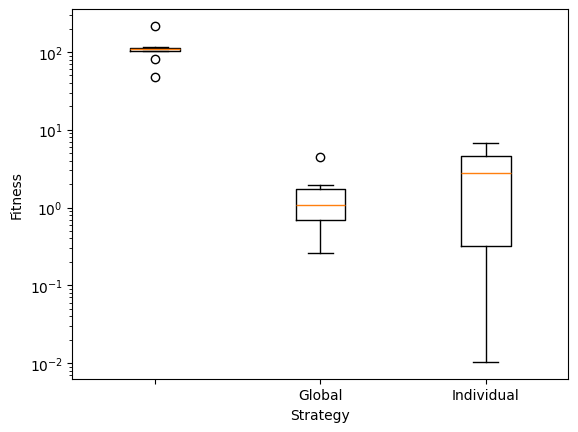

111.99703778268591 1.3993861969642185 2.8714616277309863


In [ ]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations

seed = 5 
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
#mu lambda mixingnumber maxgenerations
runs = {
    'basic' : [20, 100, 1, 100],
    'change mu up' : [50, 100, 1, 100],
    'change mu down' : [10, 100, 1, 100],
    'change lamda up' :[20, 200, 1, 50],
    'change lamda down' : [20, 40, 1, 250],
    'change mixing number up' : [20, 100, 5, 100],
    'change mixing number down' : [20, 100, 2, 100]
}


for run in runs:

    print('------------------------------------------------')

    num_vars = 10

    # parameters for the ES
    args = {}
    args["max_generations"] = runs[run][3]
    args["sigma"] = 1.0 # default standard deviation

    args["pop_size"] = runs[run][0] # mu
    args["num_offspring"] = runs[run][1] #lambda
    #args["mixing_number"] = 5 #rho

    strategy_modes = [None, GLOBAL, INDIVIDUAL]

    args["mixing_number"] = runs[run][2] #rho

    #args["problem_class"] = benchmarks.Sphere
    args["problem_class"] = benchmarks.Rosenbrock
    #args["problem_class"] = benchmarks.Rastrigin
    print({'max_generations':args["max_generations"],
           'pop_size-mu':args["pop_size"],
           "num_offspring-lambda":args["num_offspring"],
           "mixing_number-rho":args["mixing_number"],
           "problem_class":args["problem_class"]})

    num_runs = 10 # Number of runs to be done for each condition

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'ES'




    # Run the ES *num_runs* times for each strategy mode and record results     
    results = []
    for strategy_mode in strategy_modes :
        args["strategy_mode"] = strategy_mode
        results.append([run_es(rng,num_vars=num_vars, display=display,**args)
                        for _ in range(num_runs)]) 

    best_fitnesses = [[run_result[1] for run_result in runs] 
                    for runs in results]

    # Boxplot comparing the best fitnesses
    fig = figure('ES (best fitness)')
    ax = fig.add_subplot(1,1,1)
    ax.boxplot(best_fitnesses)  
    ax.set_yscale('log')
    ax.set_xticklabels(strategy_modes)
    #ax.set_xticklabels( map(lambda s: str(s), strategy_modes ) )
    ax.set_xlabel('Strategy')
    ax.set_ylabel('Fitness')
    ioff()
    show()
    print(np.mean(best_fitnesses[0]),np.mean(best_fitnesses[1]),np.mean(best_fitnesses[2]))

## best parameters

-------------------------------------
run1 {'max_generations': 50, 'pop_size': 10, 'num_offspring': 200, 'mixing_number': 5}
Trying strategy  None
Trying strategy  Global
Trying strategy  Individual


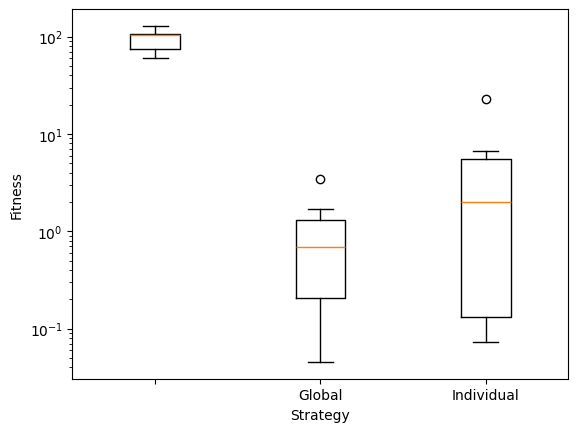

95.45141490112452 0.9524910625351772 4.366426504284539


In [5]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations

seed = 5 
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
runs={'run1':{"max_generations":50,"pop_size":10,"num_offspring":200,"mixing_number":5},
      #'run2':{"max_generations":50,"pop_size":50,"num_offspring":100,"mixing_number":5},
      #'run3':{"max_generations":50,"pop_size":30,"num_offspring":60,"mixing_number":3},
      #'run4':{"max_generations":50,"pop_size":30,"num_offspring":60,"mixing_number":3}
      }

num_vars = 10

for run in runs:
    print('-------------------------------------')
    print(run,runs[run])

    # parameters for the ES
    args = {}
    args["max_generations"] = runs[run]["max_generations"]
    args["sigma"] = 1.0 # default standard deviation
    args["pop_size"] = runs[run]["pop_size"] # mu
    args["num_offspring"] = runs[run]["num_offspring"] #lambda
    args["mixing_number"] = runs[run]["mixing_number"] #rho
    args["problem_class"] = benchmarks.Rosenbrock
    
    strategy_modes = [None, GLOBAL, INDIVIDUAL]
    num_runs = 10 # Number of runs to be done for each condition

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'ES'


    # Run the ES *num_runs* times for each strategy mode and record results     
    results = []
    for strategy_mode in strategy_modes :
        print("Trying strategy ", str(strategy_mode))
        args["strategy_mode"] = strategy_mode
        results.append([run_es(rng,num_vars=num_vars, display=display,**args)
                        for _ in range(num_runs)]) 

    best_fitnesses = [[run_result[1] for run_result in runs] 
                    for runs in results]

    # Boxplot comparing the best fitnesses
    fig = figure('ES (best fitness)')
    ax = fig.add_subplot(1,1,1)
    ax.boxplot(best_fitnesses)  
    ax.set_yscale('log')
    ax.set_xticklabels(strategy_modes)
    #ax.set_xticklabels( map(lambda s: str(s), strategy_modes ) )
    ax.set_xlabel('Strategy')
    ax.set_ylabel('Fitness')
    ioff()
    show()
    print(np.mean(best_fitnesses[0]),np.mean(best_fitnesses[1]),np.mean(best_fitnesses[2]))

# RASTRIGIN

basic [20, 100, 1, 100]
{'max_generations': 100, 'pop_size-mu': 20, 'num_offspring-lambda': 100, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


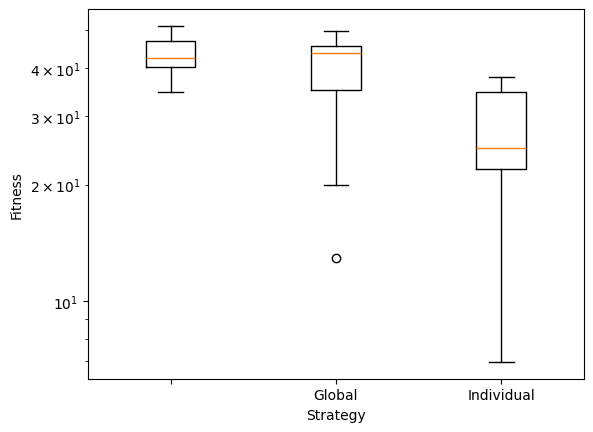

43.16550534445151 37.80830377212863 25.37692943847437
change mu up [50, 100, 1, 100]
{'max_generations': 100, 'pop_size-mu': 50, 'num_offspring-lambda': 100, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


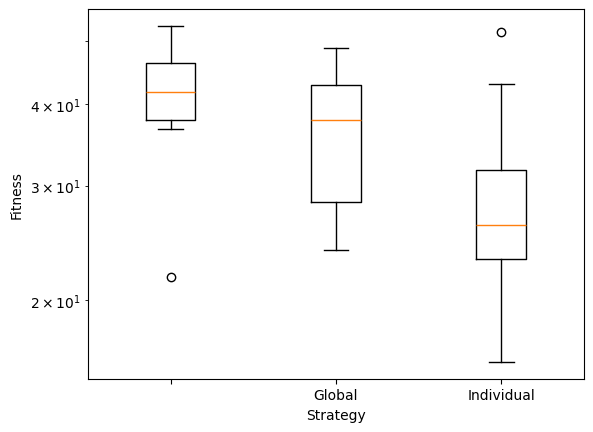

41.40922254735567 36.51492914493722 28.773748332688513
change mu down [10, 100, 1, 100]
{'max_generations': 100, 'pop_size-mu': 10, 'num_offspring-lambda': 100, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


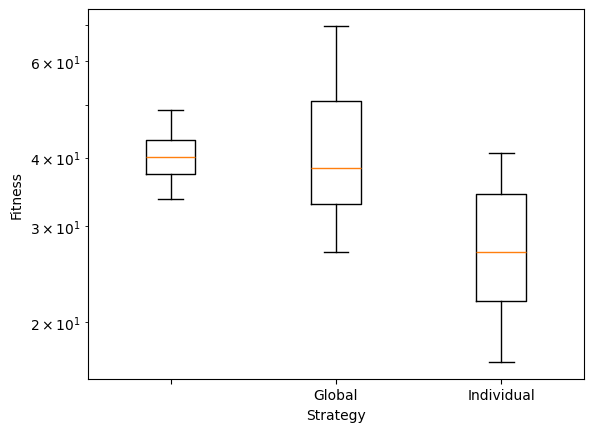

40.33540697302372 42.18609982303704 28.266081166014935
change lamda up [20, 200, 1, 50]
{'max_generations': 50, 'pop_size-mu': 20, 'num_offspring-lambda': 200, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


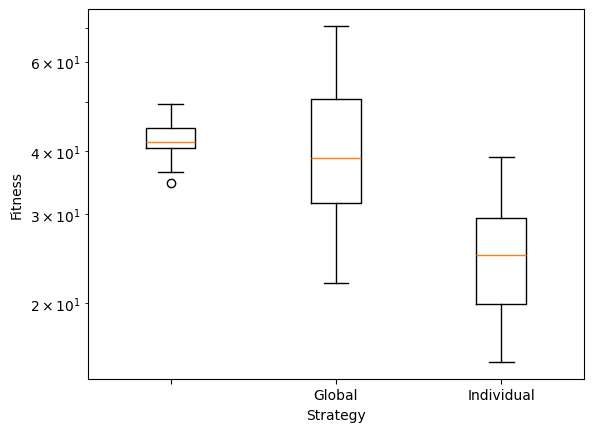

41.89595879572239 43.28052894285238 25.494670555496594
change lamda down [20, 40, 1, 250]
{'max_generations': 250, 'pop_size-mu': 20, 'num_offspring-lambda': 40, 'mixing_number-rho': 1, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


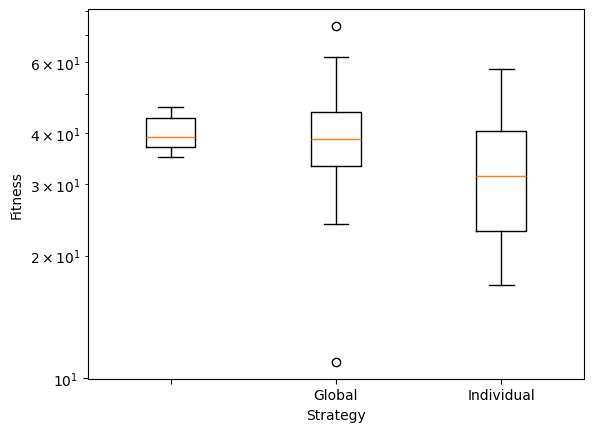

40.2346358846719 40.4946531278689 32.41549652330134
change mixing number up [20, 100, 5, 100]
{'max_generations': 100, 'pop_size-mu': 20, 'num_offspring-lambda': 100, 'mixing_number-rho': 5, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


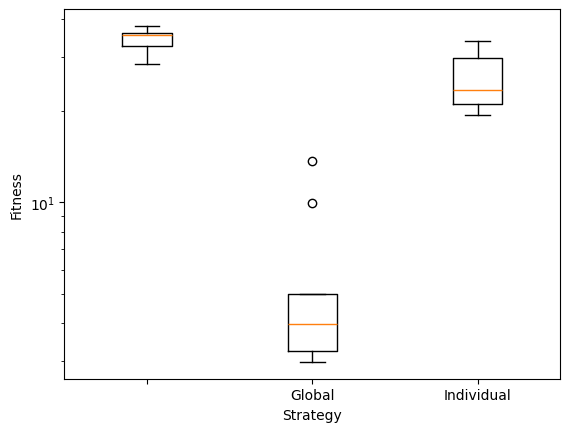

34.43833365138877 5.440741426466483 25.435317142676137
change mixing number down [20, 100, 2, 100]
{'max_generations': 100, 'pop_size-mu': 20, 'num_offspring-lambda': 100, 'mixing_number-rho': 2, 'problem_class': <class 'inspyred.benchmarks.Rastrigin'>}


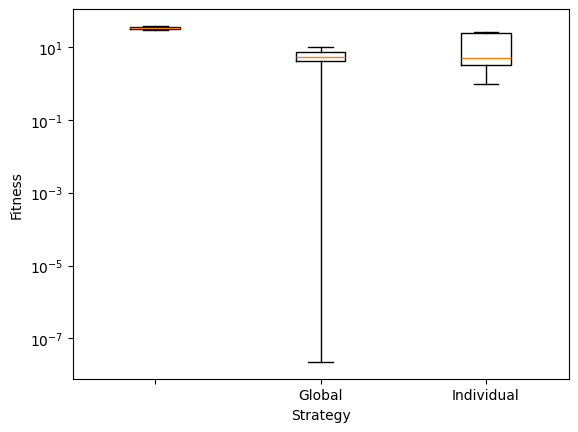

34.00451594551309 5.47227383221623 12.100763850746786


In [6]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations

seed = 5 
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
#mu lambda mixingnumber maxgenerations
runs = {
    'basic' : [20, 100, 1, 100],
    'change mu up' : [50, 100, 1, 100],
    'change mu down' : [10, 100, 1, 100],
    'change lamda up' :[20, 200, 1, 50],
    'change lamda down' : [20, 40, 1, 250],
    'change mixing number up' : [20, 100, 5, 100],
    'change mixing number down' : [20, 100, 2, 100]
}


for run in runs:

    print(run, runs[run])

    num_vars = 10

    # parameters for the ES
    args = {}
    args["max_generations"] = runs[run][3]
    args["sigma"] = 1.0 # default standard deviation

    args["pop_size"] = runs[run][0] # mu
    args["num_offspring"] = runs[run][1] #lambda
    #args["mixing_number"] = 5 #rho

    strategy_modes = [None, GLOBAL, INDIVIDUAL]

    args["mixing_number"] = runs[run][2] #rho

    #args["problem_class"] = benchmarks.Sphere
    #args["problem_class"] = benchmarks.Rosenbrock
    args["problem_class"] = benchmarks.Rastrigin
    print({'max_generations':args["max_generations"],
           'pop_size-mu':args["pop_size"],
           "num_offspring-lambda":args["num_offspring"],
           "mixing_number-rho":args["mixing_number"],
           "problem_class":args["problem_class"]})

    num_runs = 10 # Number of runs to be done for each condition

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'ES'




    # Run the ES *num_runs* times for each strategy mode and record results     
    results = []
    for strategy_mode in strategy_modes :
        args["strategy_mode"] = strategy_mode
        results.append([run_es(rng,num_vars=num_vars, display=display,**args)
                        for _ in range(num_runs)]) 

    best_fitnesses = [[run_result[1] for run_result in runs] 
                    for runs in results]

    # Boxplot comparing the best fitnesses
    fig = figure('ES (best fitness)')
    ax = fig.add_subplot(1,1,1)
    ax.boxplot(best_fitnesses)  
    ax.set_yscale('log')
    ax.set_xticklabels(strategy_modes)
    #ax.set_xticklabels( map(lambda s: str(s), strategy_modes ) )
    ax.set_xlabel('Strategy')
    ax.set_ylabel('Fitness')
    ioff()
    show()
    print(np.mean(best_fitnesses[0]),np.mean(best_fitnesses[1]),np.mean(best_fitnesses[2]))

### best parameters

-------------------------------------
run1 {'max_generations': 100, 'pop_size': 10, 'num_offspring': 200, 'mixing_number': 5}
Trying strategy  None
Trying strategy  Global
Trying strategy  Individual


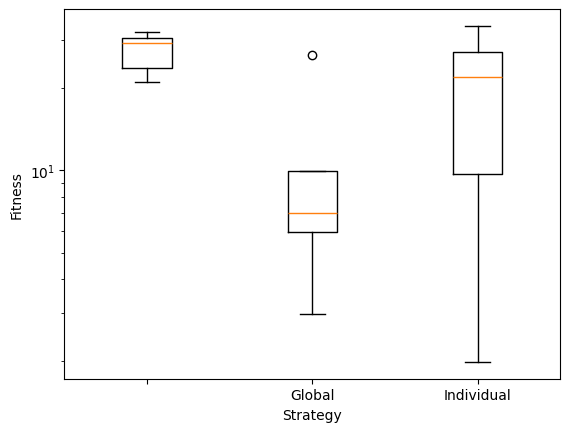

27.32561851082995 9.005269003352124 19.07033219921427


In [7]:
from pylab import *
import sys
from inspyred import ec, benchmarks
import utils.utils_03.plot_utils

from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = False # Plot initial and final populations

seed = 5 
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
runs={'run1':{"max_generations":100,"pop_size":10,"num_offspring":200,"mixing_number":5},
      #'run2':{"max_generations":50,"pop_size":50,"num_offspring":100,"mixing_number":5},
      #'run3':{"max_generations":50,"pop_size":30,"num_offspring":60,"mixing_number":3},
      #'run4':{"max_generations":50,"pop_size":30,"num_offspring":60,"mixing_number":3}
      }

num_vars = 10

for run in runs:
    print('-------------------------------------')
    print(run,runs[run])

    # parameters for the ES
    args = {}
    args["max_generations"] = runs[run]["max_generations"]
    args["sigma"] = 1.0 # default standard deviation
    args["pop_size"] = runs[run]["pop_size"] # mu
    args["num_offspring"] = runs[run]["num_offspring"] #lambda
    args["mixing_number"] = runs[run]["mixing_number"] #rho
    args["problem_class"] = benchmarks.Rastrigin
    
    strategy_modes = [None, GLOBAL, INDIVIDUAL]
    num_runs = 10 # Number of runs to be done for each condition

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'ES'


    # Run the ES *num_runs* times for each strategy mode and record results     
    results = []
    for strategy_mode in strategy_modes :
        print("Trying strategy ", str(strategy_mode))
        args["strategy_mode"] = strategy_mode
        results.append([run_es(rng,num_vars=num_vars, display=display,**args)
                        for _ in range(num_runs)]) 

    best_fitnesses = [[run_result[1] for run_result in runs] 
                    for runs in results]

    # Boxplot comparing the best fitnesses
    fig = figure('ES (best fitness)')
    ax = fig.add_subplot(1,1,1)
    ax.boxplot(best_fitnesses)  
    ax.set_yscale('log')
    ax.set_xticklabels(strategy_modes)
    #ax.set_xticklabels( map(lambda s: str(s), strategy_modes ) )
    ax.set_xlabel('Strategy')
    ax.set_ylabel('Fitness')
    ioff()
    show()
    print(np.mean(best_fitnesses[0]),np.mean(best_fitnesses[1]),np.mean(best_fitnesses[2]))

# Exercise 3

In this exercise you will explore the use of the Covariance Matrix Adaptation Evolution Strategy (CMA-ES). As described in the lecture CMA-ES is currently one of the most successful evolutionary optimizers. By using statistics gathered over generations it is able to adapt a covariance matrix in a completely derandomized way (in contrast to the ES we were just exploring).

While *inspyred* does not include a native implementation of CMA-ES, we have made one available to you through a similar interface as you have been using so far. An example of proper usage is provided in next cell.

Using this and the previous exercise as templates compare the performance of CMA-ES to the other Evolution Strategies you were just investigating.

- Can CMA-ES find optima to different problems with fewer function evaluations? si
- How do these differences change with different pop. sizes and problem dimensions?
ovviamente diminuendo il numero di variabili ho un probelma più facile e quindi è più semplice e più veloce trovare l'ottimo.
diminuendo la popolazione, ho meno individui e meno probabilità di trovare l'ottimo, al ctrario avendo più individui ho più variabilità nella popolazione e più possibilità di avere  caratteristiche ottiali


basic [10, 20]
{'pop_size': 20, 'num_vars': 10}
mu = 20.000000
(20_w,200)-CMA-ES (mu_w=18.2,w_1=9%) in dimension 10 (seed=8074, Wed Dec 18 19:11:30 2024)
Best Individual: [ 0.65273658  0.39752276  0.11481184  0.02262635 -0.00403966  0.0038701
  0.02089509 -0.00252298 -0.01663294  0.00879938]
Best Fitness: 7.580099039661183


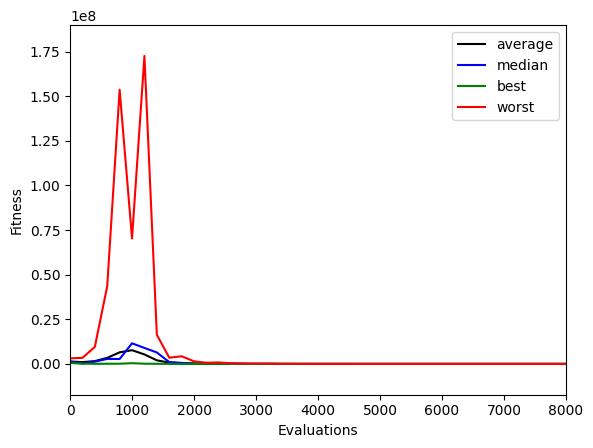

change mu up [10, 50]
{'pop_size': 50, 'num_vars': 10}
mu = 50.000000
(50_w,200)-CMA-ES (mu_w=38.8,w_1=5%) in dimension 10 (seed=26581, Wed Dec 18 19:11:30 2024)
Best Individual: [ 0.42832999  0.18487168  0.03595766  0.0070947  -0.00667978  0.03694279
  0.02417018 -0.00258586  0.02804974 -0.00275293]
Best Fitness: 8.026937390692376


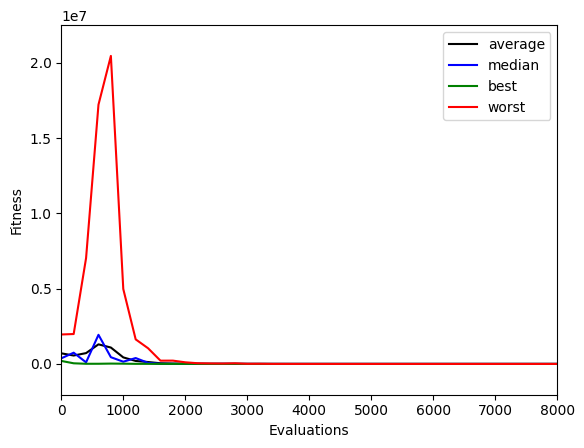

change mu down [10, 10]
{'pop_size': 10, 'num_vars': 10}
mu = 10.000000
(10_w,200)-CMA-ES (mu_w=9.5,w_1=14%) in dimension 10 (seed=69984, Wed Dec 18 19:11:31 2024)
Best Individual: [ 3.94460508e-01  1.76770808e-01  6.34782483e-02  1.39671816e-02
  4.36097345e-03  2.24375135e-02  4.11665036e-02  2.56478890e-02
 -2.11500126e-02 -6.00085350e-05]
Best Fitness: 8.232996283941736


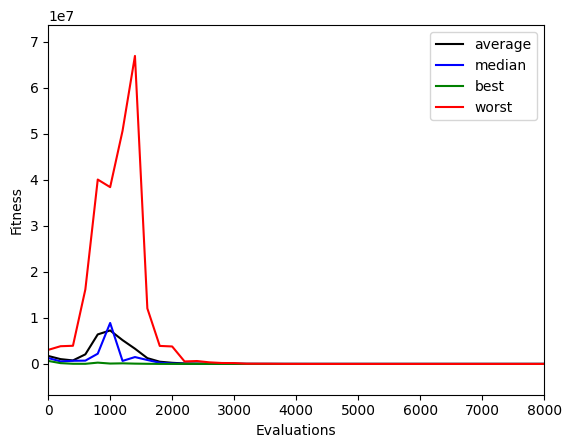

change n var up [15, 20]
{'pop_size': 20, 'num_vars': 15}
mu = 20.000000
(20_w,200)-CMA-ES (mu_w=18.2,w_1=9%) in dimension 15 (seed=81373, Wed Dec 18 19:11:32 2024)
Best Individual: [ 0.33244146  0.20909729  0.21060471  0.14724865 -0.04459682  0.00103292
  0.08410851  0.10167789 -0.12106206  0.00505171  0.05768834 -0.07855508
 -0.09288761 -0.05949141 -0.2186469 ]
Best Fitness: 28.749370133785064


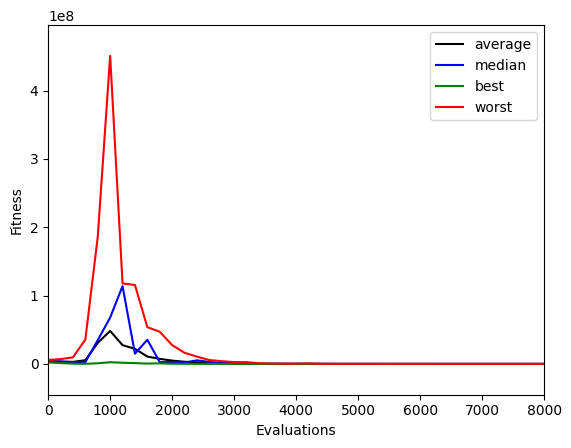

change n var down [5, 20]
{'pop_size': 20, 'num_vars': 5}
mu = 20.000000
(20_w,200)-CMA-ES (mu_w=18.2,w_1=9%) in dimension 5 (seed=11145, Wed Dec 18 19:11:32 2024)
Best Individual: [0.97124546 0.94628453 0.89804845 0.79750663 0.62768274]
Best Fitness: 0.0716805537428753


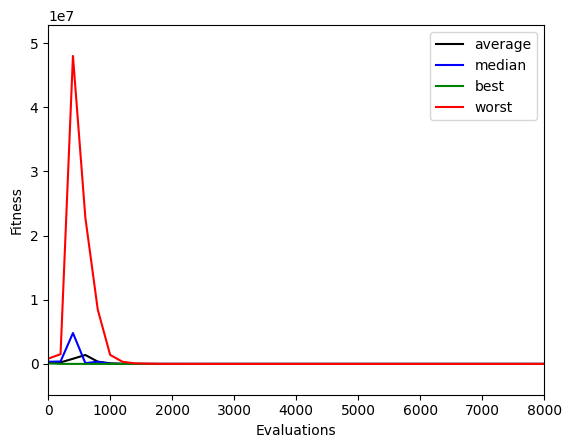

In [8]:
from pylab import *
import sys
from inspyred import benchmarks

from utils.utils_03.cma_es import *
from utils.utils_03.es import *
from utils.utils_03.inspyred_utils import NumpyRandomWrapper

display = True # Plot initial and final populations
seed = 5
rng = NumpyRandomWrapper(seed)
"""
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
#num vars   num pop
runs = {
    'basic' : [10, 20],
    'change mu up' : [10, 50],
    'change mu down' : [10, 10],
    'change n var up' :[15, 20],
    'change n var down' : [5, 20]
    
}


for r in runs:
    print(r, runs[r])
    num_vars = runs[r][0]

    # parameters for CMA-ES
    args = {}
    args["max_generations"] = 40
    args["sigma"] = 1.0 # default standard deviation

    args["pop_size"] = runs[r][1] #mu
    args["num_offspring"] = 200 #lambda

    #args["problem_class"] = benchmarks.Sphere
    args["problem_class"] = benchmarks.Rosenbrock
    #args["problem_class"] = benchmarks.Rastrigin

    print({"pop_size":args["pop_size"],"num_vars":num_vars})

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'CMA-ES'


    # Run CMA-ES
    best_individual, best_fitness = run(rng,num_vars=num_vars,
                                        display=display,use_log_scale=True,
                                        **args)

    # Display the results
    print("Best Individual:", best_individual)
    print("Best Fitness:", best_fitness)

    if display :
        ioff()
        show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions.

- Do the observations you made while varying μ, ρ, and λ confirm or contradict the conclusions you drew in the previous module's exercises?
When varying the parameters μ (parent population size), λ (offspring population size), and ρ (number of parents involved in recombination), the observations generally confirm the conclusions drawn in previous exercises:

Population Diversity: Increasing μ and λ typically enhances genetic diversity within the population. A larger parent population (μ) provides a broader genetic base, while more offspring (λ) increase the chances of generating high-quality solutions.

Selection Pressure: Adjusting ρ influences the selection pressure. A larger ρ means more parents contribute to offspring creation, promoting diversity but potentially slowing convergence. Conversely, a smaller ρ increases selection pressure, possibly leading to faster convergence but a higher risk of premature convergence.

In general is important to find a balance


Dynamic Parameter Tuning: Strategy parameters (e.g., mutation rates, step sizes) evolve alongside solution parameters, allowing the algorithm to automatically adjust to different stages of the optimization process without manual intervention.

Improved Performance: By adapting strategy parameters in real-time, self-adaptation can lead to faster convergence and better solutions, especially in complex or dynamic environments.

Enhanced Robustness: Self-adaptation makes the algorithm more robust to a variety of problem landscapes, as it can adjust to local features of the search space, such as plateaus, ridges, or valleys.

Reduced Parameter Sensitivity: It lessens the dependency on carefully chosen initial parameters, reducing the need for exhaustive parameter tuning and making the algorithm more user-friendly.

Mimicking Natural Evolution: Incorporating self-adaptation brings evolutionary algorithms closer to natural evolutionary processes, where organisms adapt not just genetically but also in their ability to evolve.

- What are the advantages of self-adaptation in evolutionary computation?

Adaptive Mutation Rates: Certain organisms can alter their mutation rates in response to environmental stress. For example, bacteria may increase mutation rates under adverse conditions to enhance the probability of beneficial mutations.

Epigenetic Changes: Epigenetics involves changes in gene expression without altering the DNA sequence. Environmental factors can cause epigenetic modifications that may be passed to offspring, allowing rapid adaptation to changing conditions.

Phenotypic Plasticity: Organisms may exhibit phenotypic changes in response to environmental cues. For instance, some plants grow taller in shaded environments to access more light.

Behavioral Adaptation: Animals can change their behavior to adapt to new environments, such as birds migrating to different regions or mammals altering feeding habits based on resource availability.

Developmental Adjustments: Some species can adjust developmental processes, like metamorphosis timing in amphibians, in response to environmental signals.

- In what ways might self-adaptation be occurring in biological organisms?


- Compare the different self-adaptation strategies explored in this exercise. 
In what ways are certain strategies better than others for optimization? 

Individual Self-Adaptation:

Advantages:
High Diversity: Each individual adapts its strategy parameters, promoting exploration of the search space.
Local Optimization: Individuals can fine-tune their search behavior based on their local environment.
Disadvantages:
Computational Overhead: Managing separate strategy parameters for each individual increases complexity.
Potential Instability: Self-adaptation might lead to overly aggressive or overly cautious parameter settings.
Global Self-Adaptation:

Advantages:
Simplicity: Fewer parameters to manage, reducing computational load.
Coherent Search Direction: The population moves cohesively, which can be beneficial in smooth landscapes.
Disadvantages:
Reduced Diversity: Shared parameters may limit the algorithm's ability to explore diverse solutions.
Less Responsive: May not adapt quickly to changes in different regions of the search space.
CMA-ES:

Advantages:
Adaptive Learning: Adjusts the covariance matrix to capture variable dependencies, enhancing search efficiency.
Robustness: Performs well on a wide range of problems, including non-separable and ill-conditioned functions.
Disadvantages:
Computational Cost: Covariance matrix adaptation is resource-intensive, especially in high-dimensional spaces.
Complexity: Implementation is more complex compared to basic ES strategies.


In what ways are certain strategies more biologically plausible than others?


- Describe what reasons may contribute to better performance of CMA-ES and what can be the conditions 
when CMA-ES is not better than a basic ES.

Reasons for Better Performance of CMA-ES
Capturing Variable Dependencies: CMA-ES adapts the covariance matrix, allowing it to learn and exploit correlations between variables, leading to more efficient search directions.

Effective in Complex Landscapes: It excels in optimizing non-separable, multimodal, and ill-conditioned problems where basic ES might struggle.

Automatic Parameter Control: CMA-ES self-adjusts its parameters, reducing the need for manual tuning and making it robust across different problem types.

Global Search Capability: Maintains a good balance between exploration and exploitation, avoiding premature convergence.

Conditions Where CMA-ES May Not Outperform Basic ES
Low-Dimensional Problems: In problems with few variables, the advantages of CMA-ES may not outweigh its computational cost, and basic ES may suffice.

Simple or Unimodal Functions: For straightforward optimization tasks, the sophisticated mechanisms of CMA-ES might be unnecessary.

Real-Time Constraints: In applications where computational speed is critical, the overhead of CMA-ES may be prohibitive.

Noisy Environments: High levels of noise can disrupt the covariance matrix adaptation, potentially making basic ES, which may be more robust to noise, a better choice.

Limited Computational Resources: In resource-constrained settings, the simpler implementation and lower computational demands of basic ES are advantageous.